In [190]:
# Reload the notebook automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [191]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import clear_output

WORK_DIR = Path(Path.cwd()).parent
sys.path.append(str(WORK_DIR))
from src import ROOT, parse
from src.models import get_model
from src.datasets.transforms import *
from src.datasets import get_dataset, get_dataloader
from src.utils import *

cfg_dir = 'mlcv-exp/data/cfg/'

In [222]:
dataset = 'fpha'
model_name = 'hand_crop_disc'
exp = 'exp2'
epoch = 100

cfg_name = '{}_{}_{}.cfg'.format(dataset, model_name, exp)
cfg = parse(str(Path(ROOT)/cfg_dir/model_name/cfg_name))
cfg['device'] = '0'
cfg['aug'] = None
cfg['batch_size'] = 1
cfg['shuffle'] = 1
cfg['mode'] = 'test'
cfg['load_epoch'] = epoch
model = get_model(cfg)
model.net.eval()
clear_output()

In [338]:
# seq_name = 'P20_03_21943_open_drawer'
# seq_name = 'P03_10_7118_open_juice'
# seq_name = 'P01_03_502_put-down_milk'
# seq_name = 'P16_01_20226_cut_fish'
# seq_name = 'P29_04_35766_search-for_scissors'
# seq_name = 'P02_09_5236_pour_salt'
# seq_name = 'P14_01_19583_put_oil'
# seq_name = 'P01_19_3995_move_chair'
# seq_name = 'P01_01_2_close_door'
seq_name = 'P23_02_29040_search-for_table'
# seq_name = 'P01_01_14_take_board'
# seq_name = 'P01_09_1549_take_potato'
# seq_name = 'P01_19_3937_rinse_pan'

# seq_name = ''
if seq_name != '':
    seq_name = '_' + seq_name

In [339]:
dataset_file = 'EPIC_KITCHENS_2018'
bbox_dataset ='concatdata'
bbox_model_name = 'yolov2_bbox'
bbox_exp = 'exp1'
bbox_epoch = 200

bbox_threshold = 0.5

img_path = '{}_{}_{}_{}_{}_{}{}_img_train.txt'.format(dataset_file, bbox_dataset, bbox_model_name, bbox_exp, bbox_epoch, str(bbox_threshold).replace('.', '_'), seq_name)
img_path = Path(ROOT)/'mlcv-exp'/'data'/'labels'/img_path
dataset_path = Path('EPIC_KITCHENS_2018')/'EK_frames'
pad = 0

# img_path = 'fpha_img_noinvalid_all_train.txt'
# img_path = Path(ROOT)/'mlcv-exp'/'data'/'labels'/img_path
# dataset_path = 'First_Person_Action_Benchmark/Video_files'
# pad = 50

conf = np.loadtxt(str(img_path).replace('img', 'bbox_conf'.format(pad)))
bbox = np.loadtxt(str(img_path).replace('img', 'bbox_pad{}'.format(pad)))
with open(img_path, 'r') as f:
    img_paths = f.read().splitlines()

In [340]:
out_thresh = 0.5

In [341]:
cnt = 0
for i in range(len(img_paths)):
    img_file = Path(ROOT)/'datasets'/dataset_path/img_paths[i]
    img = cv2.imread(str(img_file))[:, :, ::-1]
    cur_bbox = bbox[i].copy()
    outcrop, outval = model.detect_out(img, cur_bbox)
    if outval > out_thresh:
        fig, ax = plt.subplots()
        plt.axis('off')
        ax.imshow(outcrop)
        plt.show()
        cnt += 1
        print(outval)
        print('yolov2_bbox conf',conf[i])
print('{}/{}'.format(cnt, len(img_paths)))

0/65


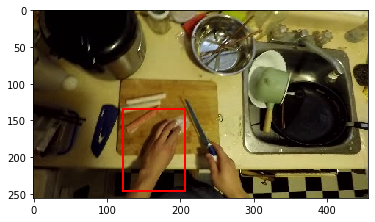

0.7128522992134094


In [301]:
idx = 0
img_file = Path(ROOT)/'datasets'/dataset_path/img_paths[idx]
img = cv2.imread(str(img_file))[:, :, ::-1]
cur_bbox = bbox[idx].copy()

x_trans = 0
y_trans = 0
cur_bbox[0] += x_trans
cur_bbox[1] += y_trans
cur_bbox[2] += x_trans
cur_bbox[3] += y_trans

fig, ax = plt.subplots()
ax.imshow(img)
draw_bbox(ax, cur_bbox)
plt.show()
print(conf[idx])

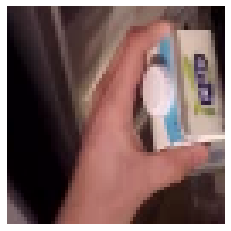

0.8114748001098633


In [53]:
model.detect(img, cur_bbox)

In [ ]:
img, _ = next(iter(model.train_dataloader))
model.detect(img, None)